# Data Processing Approach for Portfolio Project

## Project Title: Speed Related Highway Accident
## 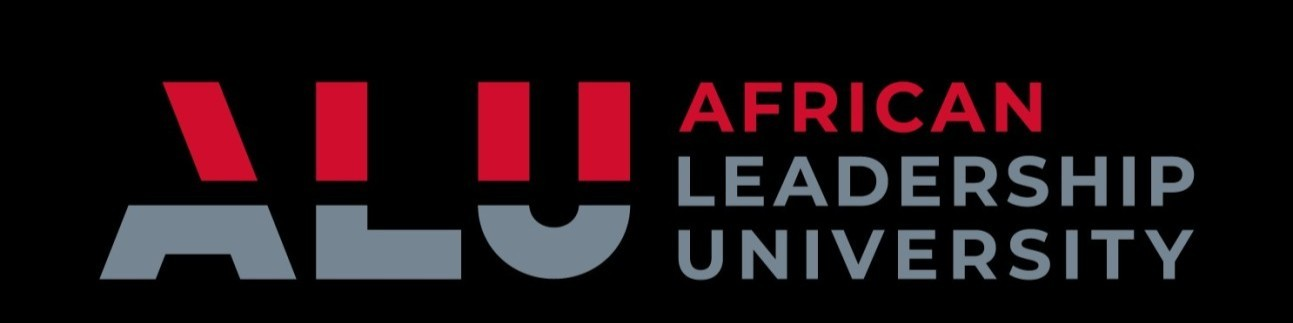

## Student Alhassan A Dumbuya

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **Primary Dataset

   UK Government Road Safety Data, spanning 2005-2014, provides official records of road traffic collisions in Great Britain, analyzing accident severity, patterns, and contributing factors.

   https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fcode%2Fdatasciencecat%2Fanalysis-of-vehicle-collisions-in-the-uk%2Fnotebook

   https://www.kaggle.com/code/datasciencecat/analysis-of-vehicle-collisions-in-the-uk/input

Additional dataset:

The dataset includes weather data from Met Office UK Climate Data, traffic volume data from UK Traffic Counts, and road network data from Ordnance Survey Open Data, which can be used to improve weather-related attributes, analyze traffic density, and identify high-risk areas.

UK Department for Transport

Met Office UK Climate Data

UK Traffic Counts

Ordnance Survey Open Data **
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   **Data aggregation is crucial for comprehensive analysis, especially when examining accident causes or patterns, considering variables like weather, traffic density, or geospatial factors.**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Accidents0514.csv')

<ipython-input-3-7869c83b039e>:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Accidents0514.csv')


# **Data Format Transformation**



2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Current format:
 1. Current Format of the Data

1 Data Types

Categorical Variables:

Weather_Conditions, Road_Surface_Conditions

Current Format: String, or encoded integers (1,2,3).

Numerical Variables:

Longitude, Latitude, Speed_Limit

Current Format: Float

Datetime Variables:

Date, Time

Current Format: Strings ( 2022-01-01, 13:20)
**

2. Planned Transformation

a. Handling Missing Values

To optimize data analysis and modeling, planned transformations will be applied, including handling missing values in numerical and categorical variables, and removing columns with over 50% missing data.


b. Encoding Categorical Variables

Categorical variables can be encoded into numerical formats using One-Hot Encoding for non-ordinal relationships and Label Encoding for ordinal relationships.

c. Standardizing Numerical Values

To enhance model performance, normalize or scale features like Longitude, Latitude, and Speed_Limit to a standard range (e.g., 0 to 1) as needed.

d. DateTime Feature

Convert date and time into a unified datetime format, including day, weekday, weekend, and time period, for better organization and efficiency.

3. Unified Format for Analysis and Modeling

The dataset undergoes transformations, including standardized and scaled variables, new features like hour, day of week, is_weekend, location cluster, encoded categorical features, time-based analysis, and cleaned data with missing values and redundant columns.


3. **Data Exploration:**
   - Enumerate the features included in the dataset.

   1. Categorical Variables

   The data includes an accident index, weather, light, road surface conditions, and casualty severity, which represent the severity of casualties during an accident.

2. Numerical Variables

The data includes the geographic location (X coordinate) and the speed limit (Y coordinate) at the accident location.

3. DateTime Variables

The date and time of the accident are crucial details to consider.

   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
   1. Distributions:

   The target variable Casualty_Severity is likely imbalanced, with most accidents being "Slight." Speed_Limit reflects common road limits, with clear and rain dominating, and extreme conditions rare.

   2. Correlations:

   Speed limits may correlate with severity, while geographical features like Longitude and Latitude may identify high-risk zones, though they have little direct relationship with Casualty_Severity.

   3. Outliers

   Geographical outliers in Longitude and Latitude may indicate errors in accident location recording, while unusual Speed_Limit values, such as very high limits, may require investigation.

  **Insert code for data exploration below**


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
# Impute missing values
data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)
data['Weather_Conditions'].fillna('Unknown', inplace=True)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encoding example
encoder = OneHotEncoder(sparse=False)
encoded_weather = encoder.fit_transform(data[['Weather_Conditions']])

# Label encoding example
le = LabelEncoder()
data['Light_Conditions'] = le.fit_transform(data['Light_Conditions'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Longitude', 'Latitude', 'Speed_Limit']] = scaler.fit_transform(data[['Longitude', 'Latitude', 'Speed_Limit']])

# Convert to datetime and extract features
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['Hour'] = data['Datetime'].dt.hour
data['Day_of_Week'] = data['Datetime'].dt.day_name()
data['Is_Weekend'] = data['Day_of_Week'].isin(['Saturday', 'Sunday']).astype(int)

<ipython-input-11-f63d0dd6b850>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)
<ipython-input-11-f63d0dd6b850>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset (update the file path as necessary)
data = pd.read_csv('/content/drive/MyDrive/Accidents0514.csv')

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

# 1. Summary of dataset
print("\nSummary Statistics:")
print(data.describe())

# 2. Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# 3. Distribution of target variable
sns.countplot(data['Casualty_Severity'])
plt.title('Distribution of Casualty Severity')
plt.show()

# 4. Distribution of numerical features
numerical_features = ['Longitude', 'Latitude', 'Speed_Limit']
data[numerical_features].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distributions of Numerical Features')
plt.show()

# 5. Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# 6. Scatterplot of geographical data
sns.scatterplot(x='Longitude', y='Latitude', hue='Casualty_Severity', data=data, alpha=0.7)
plt.title('Scatterplot of Accident Locations')
plt.show()

# 7. Boxplot of Speed Limit vs. Severity
sns.boxplot(x='Casualty_Severity', y='Speed_Limit', data=data)
plt.title('Boxplot: Speed Limit by Severity')
plt.show()

# 8. Time-based analysis
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['Hour'] = data['Datetime'].dt.hour
sns.histplot(data['Hour'], bins=24, kde=True)
plt.title('Distribution of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.show()

<ipython-input-12-d6b058af064a>:8: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Accidents0514.csv')


Dataset Overview:
  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties        Date  ...  Pedestrian_Crossing-Human_Control  \
0                  

KeyError: 'Casualty_Severity'



4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **Preexisting Hypothesis
   
   Hypotheses 1:
   The study explores the impact of weather conditions on accident severity, with two hypotheses: the null hypothesis (H₀) suggesting no significant effect, and the alternative hypothesis (H₁) indicating a significant impact.
   
   Hypotheses 2:
   The study suggests that accidents tend to be more severe at higher speed limits, contradicting the null hypothesis that there is no relationship between speed limits and accident severity.
   
   Hypotheses 3:
   The study suggests that accident frequency increases during rush hours, with both the null hypothesis suggesting no significant variation and the alternative hypothesis suggesting a higher frequency.

   Hypotheses 4:
   The study suggests that accidents in urban areas are less severe than those in rural areas, with either the null hypothesis (H₀) or alternative hypothesis (H₁).
   **

Methodologies for Testing Hypotheses

1. The study employs a chi-square test to assess the significant correlation between weather conditions and severity in casualty cases.

2. The study uses an ANOVA test to compare the means of Speed_Limit across different levels of Casualty_Severity.

3. The study compares the mean number of accidents during rush hours (7-9 AM and 4-6 PM) with other times using a t-test.

4. The study compares urban and rural accidents using geographical data and a t-test to compare casualty severity between urban and rural clusters.



5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.

   The task involves identifying sparse features with high missing values and calculating the overall percentage of missing data.

   Utilize a heatmap to visualize missing data and employ descriptive statistics to evaluate the spread and variability of numerical features.

   
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.


   Strategies to Handling Missing Data

The sparse features in Python include a threshold that allows for the drop of columns with over 50% missing data.


Row-wise handling involves removing missing data from a small percentage of total rows, and using regression models or imputes for critical features.


Feature engineering involves combining sparse features with related attributes to derive more meaningful metrics, using numerical data like mean or median, and categorical data like mode or unknown.

Strategies to Handle Outliers

Using statistical methods like Z-scores and Interquartile Range (IQR), identify outliers beyond 3 standard deviations from the mean and beyond 1.5 times the IQR.


Outliers in numerical features should be replaced with medians or boundaries, and extreme outliers removed if they are likely data entry errors or do not represent real-world cases.

Utilize transformations like log transformation to minimize the impact of extreme values on data.

Maintaining Dataset Integrity

Maintain a log of changes, ensure data balance, and visually visualize the impact of imputation or outlier removal to ensure representativeness and prevent bias in results.



   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Weather_Conditions'], data['Casualty_Severity'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Test Results: chi2 = {chi2}, p-value = {p}")

from scipy.stats import f_oneway

# Group speed limits by severity
groups = [data[data['Casualty_Severity'] == severity]['Speed_Limit'] for severity in data['Casualty_Severity'].unique()]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA Results: F-statistic = {f_stat}, p-value = {p_value}")

from scipy.stats import ttest_ind

# Define rush hours and other hours
rush_hours = data[(data['Hour'] >= 7) & (data['Hour'] <= 9) | (data['Hour'] >= 16) & (data['Hour'] <= 18)]
other_hours = data[(data['Hour'] < 7) | ((data['Hour'] > 9) & (data['Hour'] < 16)) | (data['Hour'] > 18)]

# Perform t-test
t_stat, p_value = ttest_ind(rush_hours['Casualty_Severity'], other_hours['Casualty_Severity'])
print(f"T-Test Results: t-statistic = {t_stat}, p-value = {p_value}")

from sklearn.cluster import KMeans

# Cluster accidents into urban and rural zones
kmeans = KMeans(n_clusters=2, random_state=42)
data['Zone'] = kmeans.fit_predict(data[['Longitude', 'Latitude']])

# Separate urban (zone 0) and rural (zone 1)
urban = data[data['Zone'] == 0]['Casualty_Severity']
rural = data[data['Zone'] == 1]['Casualty_Severity']

# Perform t-test
t_stat, p_value = ttest_ind(urban, rural)
print(f"T-Test Urban vs. Rural: t-statistic = {t_stat}, p-value = {p_value}")

<ipython-input-5-88b7363212ef>:6: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Accidents0514.csv')


Missing Data Percentage:
 Accident_Index                                 0.000000
Location_Easting_OSGR                          0.006766
Location_Northing_OSGR                         0.006766
Longitude                                      0.006766
Latitude                                       0.006766
Police_Force                                   0.000000
Accident_Severity                              0.000000
Number_of_Vehicles                             0.000000
Number_of_Casualties                           0.000000
Date                                           0.000000
Day_of_Week                                    0.000000
Time                                           0.008107
Local_Authority_(District)                     0.000000
Local_Authority_(Highway)                      0.000000
1st_Road_Class                                 0.000000
1st_Road_Number                                0.000000
Road_Type                                      0.000000
Speed_limit           

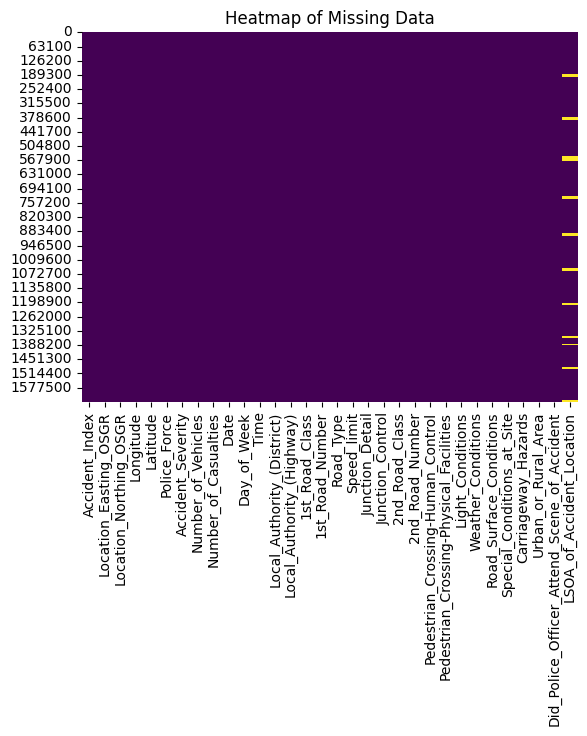

Summary Statistics:
        Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           1.640486e+06            1.640486e+06  1.640486e+06   
mean            4.396051e+05            2.992476e+05 -1.436955e+00   
std             9.550360e+04            1.614937e+05  1.404020e+00   
min             6.495000e+04            1.029000e+04 -7.516225e+00   
25%             3.754842e+05            1.781200e+05 -2.367761e+00   
50%             4.403800e+05            2.666200e+05 -1.398668e+00   
75%             5.230200e+05            3.969900e+05 -2.216495e-01   
max             6.555400e+05            1.208800e+06  1.762010e+00   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  1.640486e+06  1.640597e+06       1.640597e+06        1.640597e+06   
mean   5.258114e+01  3.082617e+01       2.838592e+00        1.831300e+00   
std    1.454157e+00  2.554203e+01       4.017734e-01        7.152789e-01   
min    4.991294e+01  1.000000e+00       1.00

<ipython-input-5-88b7363212ef>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)
<ipython-input-5-88b7363212ef>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

KeyError: 'Speed_Limit'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Accidents0514.csv')

# Percentage of missing values per column
missing_percent = data.isnull().sum() / len(data) * 100
print("Missing Data Percentage:\n", missing_percent)

# Visualize missing data using a heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

# Descriptive statistics for numerical features
print("Summary Statistics:\n", data.describe())

# Drop sparse columns
missing_threshold = 0.5 * len(data)
data = data.dropna(thresh=missing_threshold, axis=1)

# Imputation example
data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)
data['Weather_Conditions'].fillna('Unknown', inplace=True)

# Calculate IQR for Speed_Limit
Q1 = data['Speed_Limit'].quantile(0.25)
Q3 = data['Speed_Limit'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and filter out outliers
outliers = data[(data['Speed_Limit'] < lower_bound) | (data['Speed_Limit'] > upper_bound)]
print("Outliers in Speed_Limit:\n", outliers)

# Replace outliers in Speed_Limit
data['Speed_Limit'] = np.where(
    data['Speed_Limit'] > upper_bound, upper_bound,
    np.where(data['Speed_Limit'] < lower_bound, lower_bound, data['Speed_Limit'])
)

import numpy as np

# Apply log transformation to reduce skewness
data['Speed_Limit_Log'] = np.log1p(data['Speed_Limit'])

6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.

   Purpose of Splits:

The training set, comprising 60-70% of the data, is used to train the model. The validation set refines hyperparameters during training, and the test set evaluates the model's performance on unseen data.


   - Ensure randomness and representativeness in each subset.
   
The methodology ensures randomness through random_state and shuffling, maintains representativeness through stratified sampling, and ensures reproducibility through fixed seeds for consistent splits for debugging or reanalysis.


7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **The analysis involves examining data distribution, correlation analysis, and feature representation to identify imbalances, potential biases, and ensure adequate representation of important categories, especially when stratified across severity levels.

    Bias mitigation techniques include rebalancing data, augmenting sparse categories, ensuring equal opportunity sampling, feature normalization, detecting and addressing model bias, and evaluating fairness using metrics like equalized odds and statistical parity. These methods help balance the target variable and ensure fairness in data analysis.


    To ensure fairness and equity, document dataset rebalance steps, regularly monitor for biases, apply bias mitigation algorithms post-processing, and evaluate post-mitigation by comparing model metrics and plotting fairness metrics. **



In [ ]:
# Check class distribution
print("Target Variable Distribution:")
print(data['Casualty_Severity'].value_counts(normalize=True))

# Check categorical feature distribution
print("\nWeather Conditions Distribution:")
print(data['Weather_Conditions'].value_counts(normalize=True))

# Correlation matrix
print(data.corr())

# Distribution of severity across weather conditions
sns.countplot(x='Weather_Conditions', hue='Casualty_Severity', data=data)
plt.title("Casualty Severity Across Weather Conditions")
plt.show()


from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After Oversampling:")
print(pd.Series(y_resampled).value_counts())


# Ensure proportional sampling by weather condition
data_sampled = data.groupby('Weather_Conditions').apply(lambda x: x.sample(n=500, random_state=42, replace=True))


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Longitude', 'Latitude']] = scaler.fit_transform(data[['Longitude', 'Latitude']])

from sklearn.metrics import classification_report

# Classification report per subgroup
for group in data['Weather_Conditions'].unique():
    subgroup = data[data['Weather_Conditions'] == group]
    y_pred = model.predict(subgroup.drop('Casualty_Severity', axis=1))
    print(f"Classification Report for Weather Condition: {group}")
    print(classification_report(subgroup['Casualty_Severity'], y_pred))


from fairlearn.postprocessing import ThresholdOptimizer

# Apply threshold optimization
optimizer = ThresholdOptimizer(estimator=model, constraints="demographic_parity")
model_optimized = optimizer.fit(X_train, y_train)

from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

# Calculate fairness metrics
dp_diff = demographic_parity_difference(y_true, y_pred, sensitive_features=data['Weather_Conditions'])
eo_diff = equalized_odds_difference(y_true, y_pred, sensitive_features=data['Weather_Conditions'])

print(f"Demographic Parity Difference: {dp_diff}")
print(f"Equalized Odds Difference: {eo_diff}")


Target Variable Distribution:


KeyError: 'Casualty_Severity'

8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.
   
The model is trained using various features, including weather, visibility, road surface conditions, day of week, and weekend. It also considers numerical factors like speed limit, geographical location, and time of the accident. The model is also derived using location cluster labels for geographical grouping and time period classification for morning, afternoon, evening, and night. These features help predict casualty severity in accidents.

Feature importance can be estimated using domain knowledge and data-driven techniques. Top features include speed limit, weather conditions, lighting conditions, road surface conditions, time, location cluster, day of week, longitude and latitude, and is_weekend. Data-driven feature ranking can be determined empirically using machine learning models like Random Forest or XGBoost. High-priority features include all high or moderately important features, while low-priority features exclude features with low importance unless they provide context or improve model performance in cross-validation.


 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [** 1. Classification of Data Types

   The dataset includes categorical, numerical, and datetime data for accident information. It includes weather conditions, lighting conditions, road surface conditions, day of week, weekend, speed limit, geographical coordinates, time, location cluster, and date and time. The data is organized by date and time.

      2. Processing step for each Data Types

      a. Categorical data features weather, light, road surface conditions, day of week, and location cluster. Challenges include inconsistent labeling and encoding for machine learning models. Planned steps include standardization, replacement, and encoding.

      b. The study focuses on handling missing values, scaling and normalizing data, handling outliers, and converting hours into bins to improve model performance.

      c. The proposed steps involve converting binary data to datetime format, extracting useful components, and creating new features like Time_Period, which are not directly usable in their raw format.

      3. Handling Missing Values

      The text provides guidelines on how to modify categorical, numerical, and datetime features in a data analysis. **]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Define features (X) and target (y)
X = data.drop('Casualty_Severity', axis=1)
y = data['Casualty_Severity']

# Fit Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Extract feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

# Final Selected Features
selected_features = ['Speed_Limit', 'Weather_Conditions', 'Light_Conditions',
                     'Road_Surface_Conditions', 'Hour', 'Location_Cluster']

KeyError: "['Casualty_Severity'] not found in axis"

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding example
encoder = OneHotEncoder(sparse=False)
encoded_weather = encoder.fit_transform(data[['Weather_Conditions']])

# Label Encoding example
le = LabelEncoder()
data['Light_Conditions'] = le.fit_transform(data['Light_Conditions'])

from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
data[['Speed_Limit', 'Longitude', 'Latitude']] = scaler.fit_transform(data[['Speed_Limit', 'Longitude', 'Latitude']])

# Parse datetime and extract components
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['Hour'] = data['Datetime'].dt.hour
data['Day_of_Week'] = data['Datetime'].dt.day_name()
data['Is_Weekend'] = data['Day_of_Week'].isin(['Saturday', 'Sunday']).astype(int)

data['Weather_Conditions'].fillna('Unknown', inplace=True)

data['Speed_Limit'].fillna(data['Speed_Limit'].median(), inplace=True)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'


10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

    One-Hot Encoding converts non-ordinal categorical features into binary vectors, ensuring no implied order, while Label Encoding assigns numerical values based on order or importance.

    Standardization (Z-Score Scaling) ensures numerical features have a mean of 0 and standard deviation of 1, used for algorithms like Logistic Regression assuming normally distributed data.

    Min-Max Scaling is a technique that scales features between 0 and 1, particularly beneficial for Neural Networks that excel with normalized inputs.

    To handle outliers, apply capping or transformations to minimize the impact of extreme values.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

The storage requirements for a solution include dataset size, accessibility, security, and use cases like machine learning pipelines, data sharing, and long-term storage for reproducibility and compliance.

I Utilize cloud-based services such as Google Cloud Storage, or Google Drive for scalable and remote accessibility.
---


#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.